# Introduction Tutorial

## Assignment grading and Requirements

There will be 5 assignment sheets--one every other week. The first one will be out after this tutorial and is due on Thursday, November 9th.

Each assignment sheet will be worth 10 points, in total you need 30 out of 50 points to be eligible for the exam. Each task of the assignment will be worth a quanitity of points which you will get based on an all-or-nothing-scheme. This means: If the task is correct or you showed *reasonable effort* you will get full points. Notice that we don't expect everything to be correct to give you full points for an exercise. 

Assignments **must** be submitted in teams (two students per team) through Ilias. All questions regarding assignments should be asked through Ilias and we tutors **will not answer e-mails** with individual questions regarding assignment sheets. If you want to ask a specific individual question, come to one of our tutorials on Fridays, 8.30 at Maria-von-Lindenstraße 6. 

## Content and Structure of the Assignment Sheets

Each assignment will contain coding tasks and open questions regarding lecture content and will be released as a single jupyter notebook. Please submit all solutions as **one** PDF-file through Ilias. Make sure to add both of your names to the submission. File naming convention is: surname1_surname2_assignment(x).pdf where (x) is the number of the assignment. 

## Datasets

Throughout the course we will work with open power system data. Information regarding the datasets and free aggregated datasets can be found here: https://open-power-system-data.org. We will mainly work with timeseries data relevant for power system modelling which can be found under [time-series](https://data.open-power-system-data.org/time_series/2020-10-06). The time-series contain ~5 years of power data of 32 different countries. Scroll to `Download`, and click on `Filter` next to the `time_series_60min_singleindex.csv`. Choose a country and download the full timeperiod and variables available for that country. Take your time to get familiar with the data provided, its sources and think about what they can be used for and what their shortcomings are and discuss the following questions with your neighbour: 

1. What's the data source? 

2. What can the data be used for? 


3. What are shortcomings of the data? 

In [ ]:
# 1. The main data sources are the various European Transmission System Operators (TSOs), the ENTSO-E Power Statistics and the ENTSO-E Transparency Platform. 

# 2. timeseries prediction

# 3. Aggregated data to the stepsize and country. Couldn't find out details (specific energy on location or on shorter period of time)
#    only until 2020 but newer data exists on other platforms



In [58]:
# import packages
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# import data
de_energy_data = pd.read_csv("../data/time_series_60min_singleindex_filtered_DE_allfeatures.csv")

              utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       DE_load_actual_entsoe_transparency  \
0                                     NaN   
1                                 41151.0   
2                                 40135.0   
3                                 39106.0   
4                                 38765.0   
...                                   ...   


In [81]:
crop_de_energy_data = de_energy_data[48000:50000]
crop_de_energy_data.head()

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
48000,2020-06-22T23:00:00Z,2020-06-23T01:00:00+0200,40567.0,40501.0,NaN,0.0,NaN,NaN,4693.0,NaN,NaN,509.0,NaN,NaN,4184.0,NaN
48001,2020-06-23T00:00:00Z,2020-06-23T02:00:00+0200,39817.0,39523.0,NaN,0.0,NaN,NaN,4062.0,NaN,NaN,394.0,NaN,NaN,3668.0,NaN
48002,2020-06-23T01:00:00Z,2020-06-23T03:00:00+0200,39672.0,39681.0,NaN,0.0,NaN,NaN,3847.0,NaN,NaN,495.0,NaN,NaN,3352.0,NaN
48003,2020-06-23T02:00:00Z,2020-06-23T04:00:00+0200,40520.0,40643.0,NaN,5.0,NaN,NaN,3702.0,NaN,NaN,514.0,NaN,NaN,3188.0,NaN
48004,2020-06-23T03:00:00Z,2020-06-23T05:00:00+0200,43401.0,43099.0,NaN,359.0,NaN,NaN,3592.0,NaN,NaN,506.0,NaN,NaN,3085.0,NaN


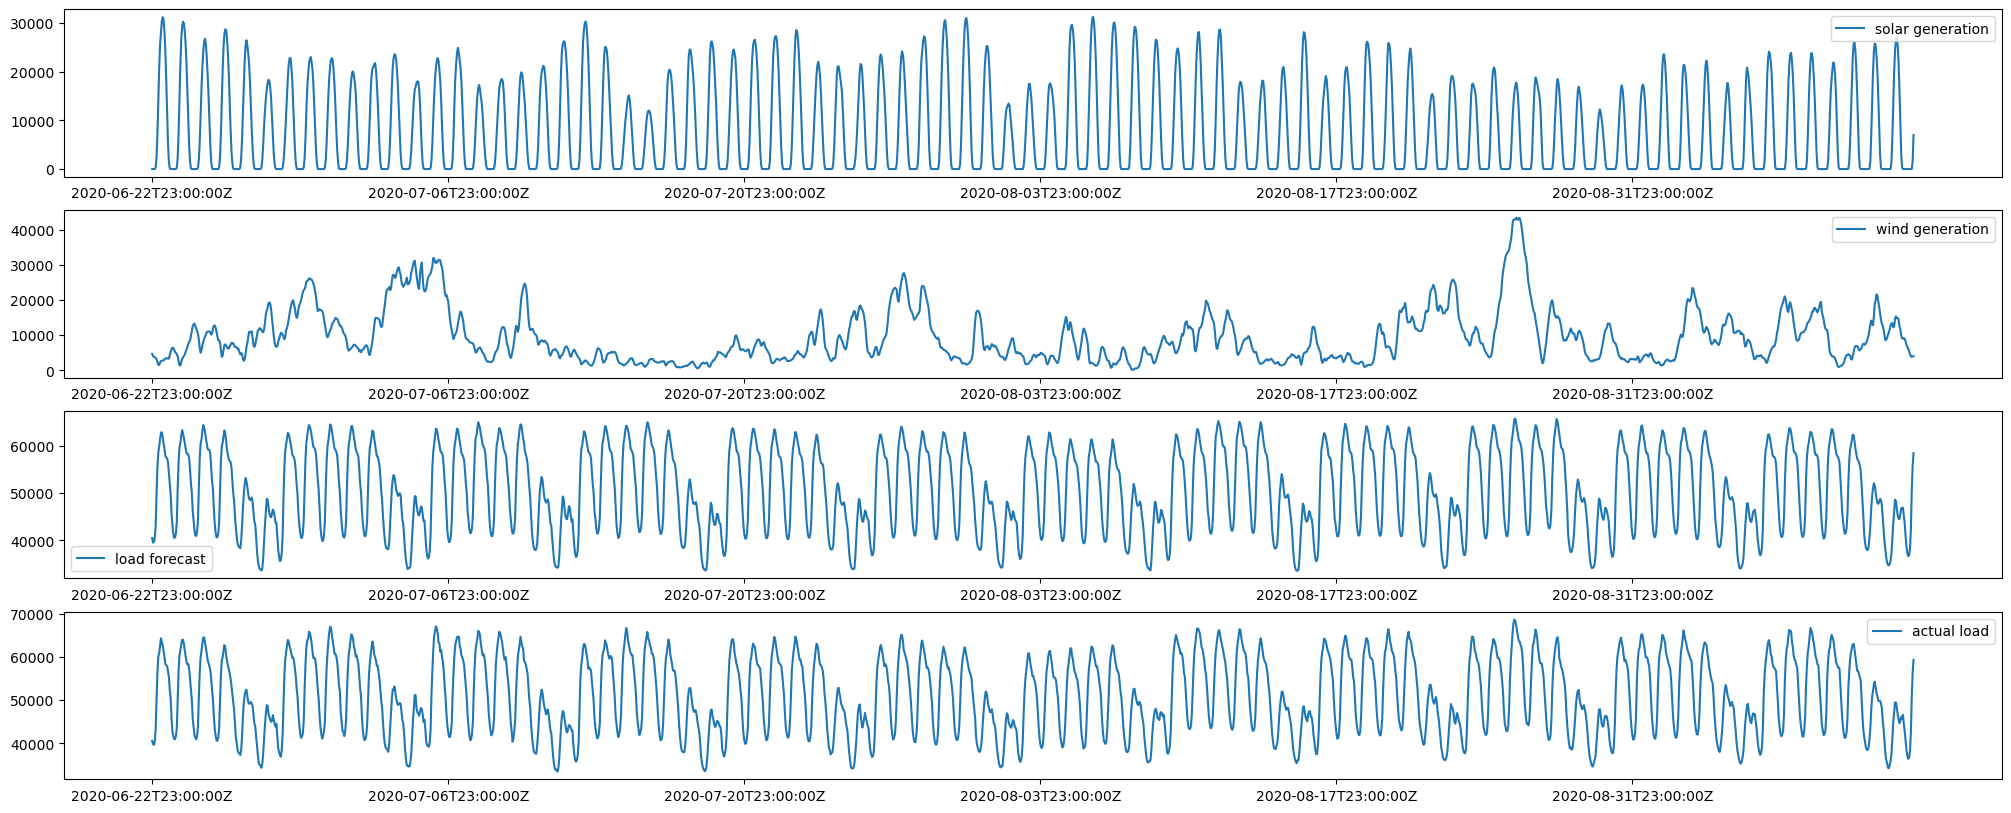

In [82]:
# plot different time series
skip_days = 14
skip_hours = 24*skip_days


# Solar daily pattern and also yearly cycle
# wind: usually more wind in winter, 2021 was a bad wind year
# load: weekend and week days pattern, also daily pattern

# Maybe solar or wind power has increased over the last years

keys = ['DE_solar_generation_actual','DE_wind_generation_actual','DE_load_forecast_entsoe_transparency','DE_load_actual_entsoe_transparency']
labels = ['solar generation', 'wind generation', 'load forecast', 'actual load']

fig, axs = plt.subplots(4,1, figsize=(25,10), dpi=100)

for i, (key, label) in enumerate(zip(keys, labels)):
    axs[i].plot(crop_de_energy_data['utc_timestamp'], crop_de_energy_data[key], label=label)
    axs[i].set_xticks(np.array(list(crop_de_energy_data['utc_timestamp']))[::skip_hours])
    axs[i].legend()

The data we'll be working with are time-series of renewable power data. Discuss the following questions with your neighbour.

What's the difference of this type of data compared to e.g. conventional power data? 

What are similarities? 

In [ ]:
# Main difference: weather dependence, we rely on forecast of e.g. wind

# Incorporate knowledge about world in model (e.g at night people sleep -> no energy needed)


## Summary Statistics

Let's have a closer look at the data and country you have chosen.

Are there any hints in the dataset that indicate whether the country you've chosen increased its wind power capacity?

## Wind generation

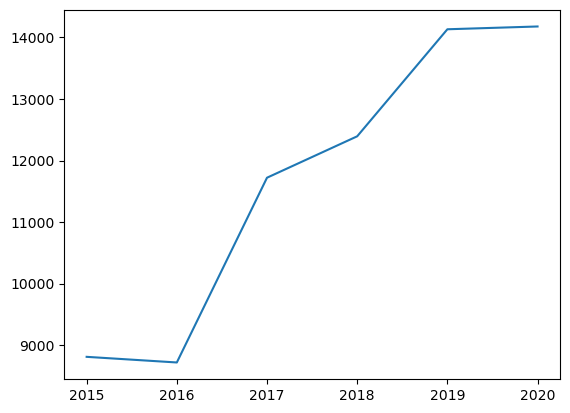

In [103]:
# plot 
de_energy_data["date"] = pd.to_datetime(de_energy_data['utc_timestamp'])
means = de_energy_data["DE_wind_generation_actual"].groupby(de_energy_data["date"].dt.year).mean()
plt.plot(means)

Are there any hints in the dataset that indicate whether the country you've chosen increased its PV power capacity?

## Solar generation

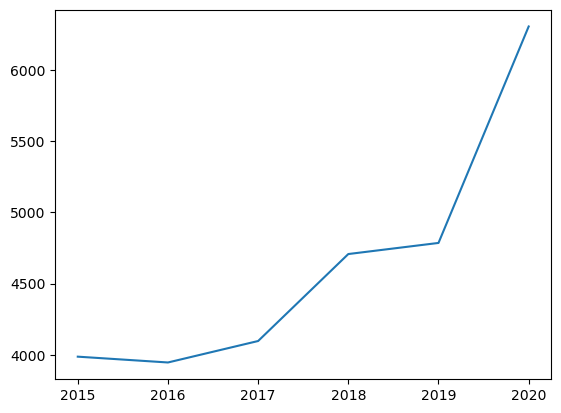

In [104]:
# plot
de_energy_data["date"] = pd.to_datetime(de_energy_data['utc_timestamp'])
means = de_energy_data["DE_solar_generation_actual"].groupby(de_energy_data["date"].dt.year).mean()
plt.plot(means)

What about the seasonality of the data? 

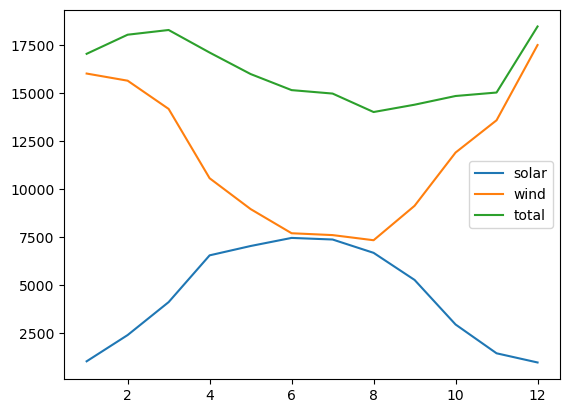

In [111]:
# plot
means_solar = de_energy_data["DE_solar_generation_actual"].groupby(de_energy_data["date"].dt.month).mean()
plt.plot(means_solar, label="solar")
means_wind = de_energy_data["DE_wind_generation_actual"].groupby(de_energy_data["date"].dt.month).mean()
plt.plot(means_wind, label="wind")
plt.plot(means_solar+means_wind, label="total")
plt.legend()

# Dunkelflaute in autumn (less sun but not yet a lot of wind)

If you have time left: Download this [dataset](https://data.open-power-system-data.org/renewable_power_plants/2020-08-25) and have a look at the geographic distribution of renewable power plant. Otherwise: Do an online research about *your* country and its situation regarding renewables. 